## Assignment 1a: Machine Learning Methods

### Afthash Sahal Ubaid Puzhakkal a1913863

#### How can we use data analytics to predict energy usage for this house?

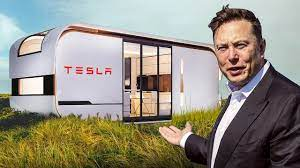

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [619]:
# Importing all the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [620]:
#Reading the data
df = pd.read_csv("energydata_complete.csv")

In [621]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### 2. Analyse and visualise the data

In [622]:
#From displaying the info, we can see that there are 19735 values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [623]:
#There are no null values.
df.isna().sum().sum()

0

In [624]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [625]:
#Making sure the date column is in datetime format with the day first
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

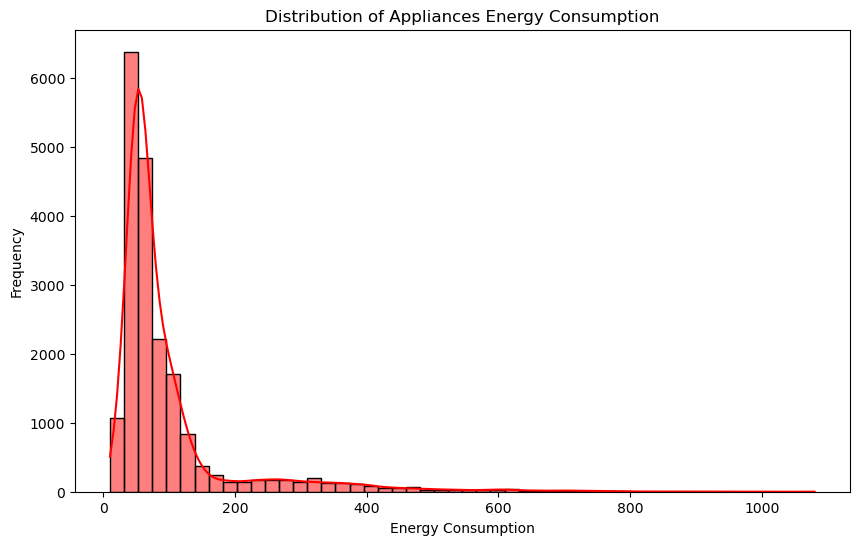

In [626]:
#Plotting the Distribution of Appliance Energy Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['Appliances'], bins=50, kde=True, color='red')
plt.title('Distribution of Appliances Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

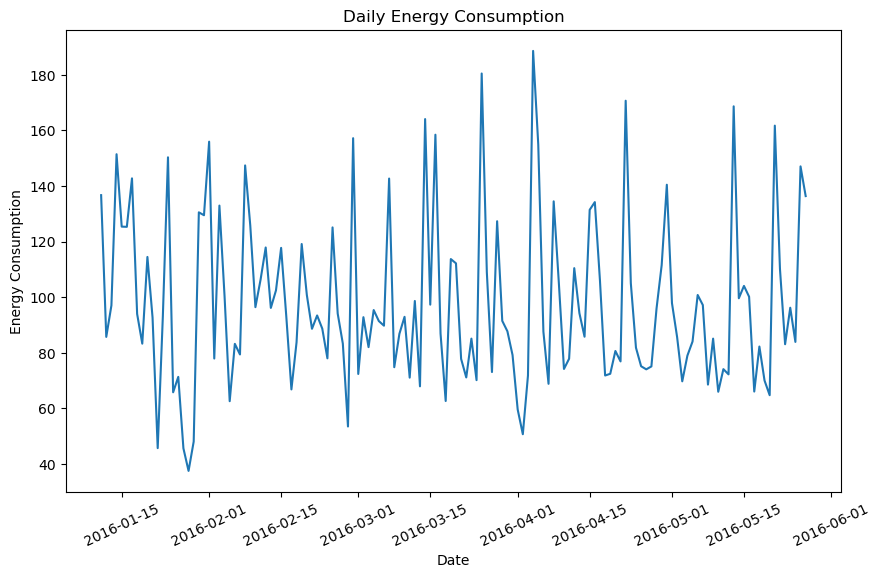

In [627]:
#Plotting daily energy consumption via a time series graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.set_index('date').resample("D").mean().index, y="Appliances", data=df.set_index('date').resample("D").mean())
plt.title('Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=25)
plt.show()

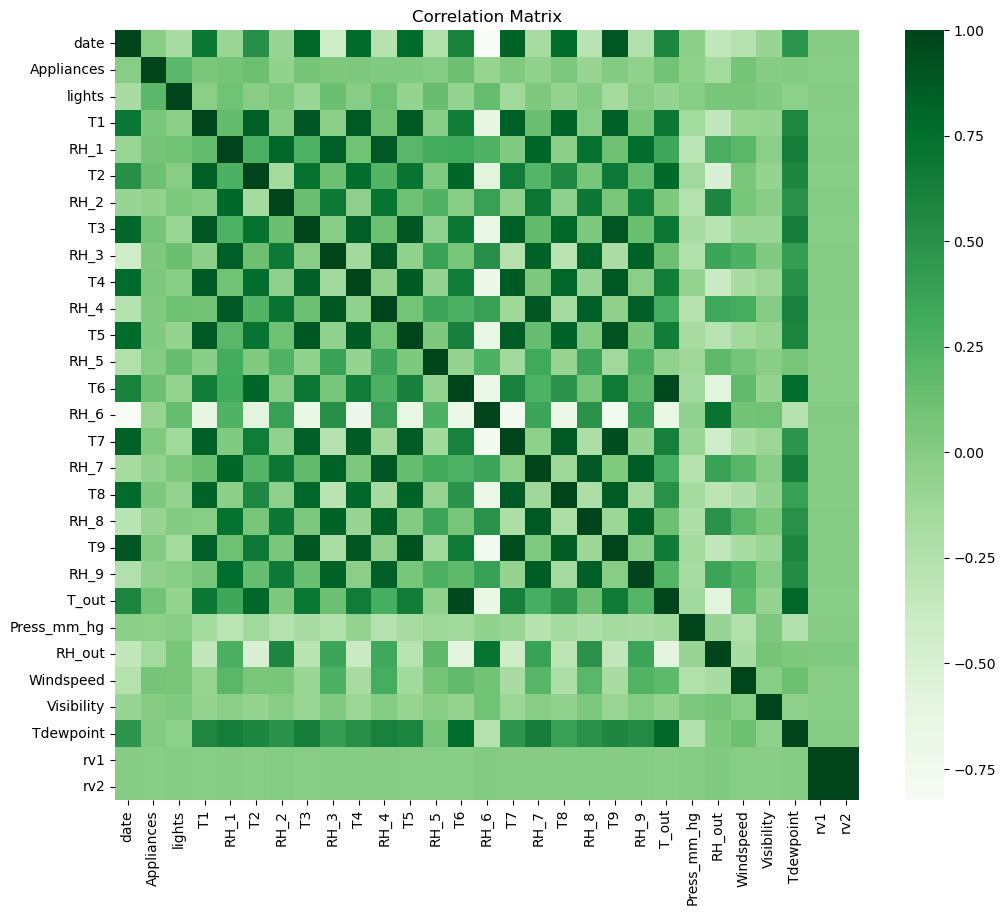

In [628]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="Greens")
plt.title('Correlation Matrix')
plt.show()

In [629]:
#Creating a new column that shows the day of the week
df["Day_of_week"] = df["date"].dt.day_name()

In [630]:
#Creating a new column that shows whether it's a weekday or a weekend
df["Week_Status"] = df["date"].dt.day_of_week.map({0: 'weekday', 1: 'weekday', 2: 'weekday', 3: 'weekday', 4: 'weekday', 5: 'weekend', 6: 'weekend'})

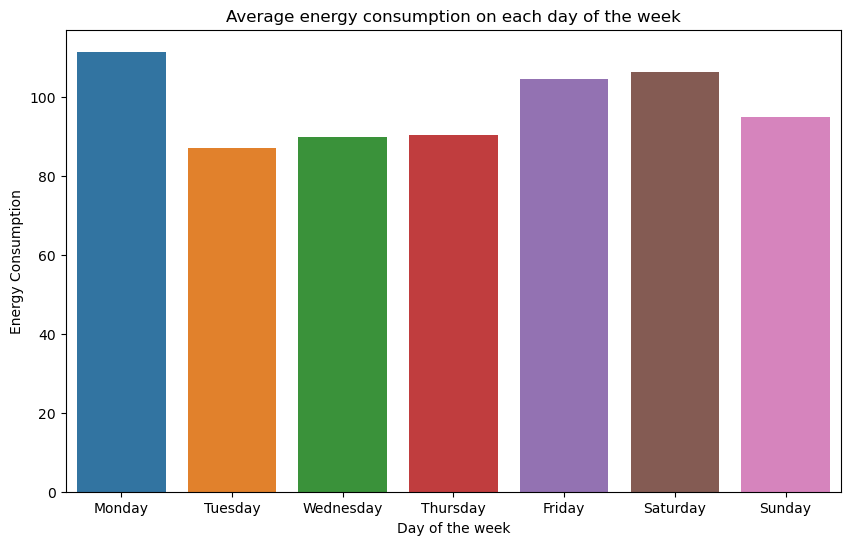

In [631]:
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='Day_of_week', y='Appliances', order=order, data=df.groupby('Day_of_week')['Appliances'].mean().reset_index())
plt.title("Average energy consumption on each day of the week")
plt.xlabel('Day of the week')
plt.ylabel('Energy Consumption')
plt.show()

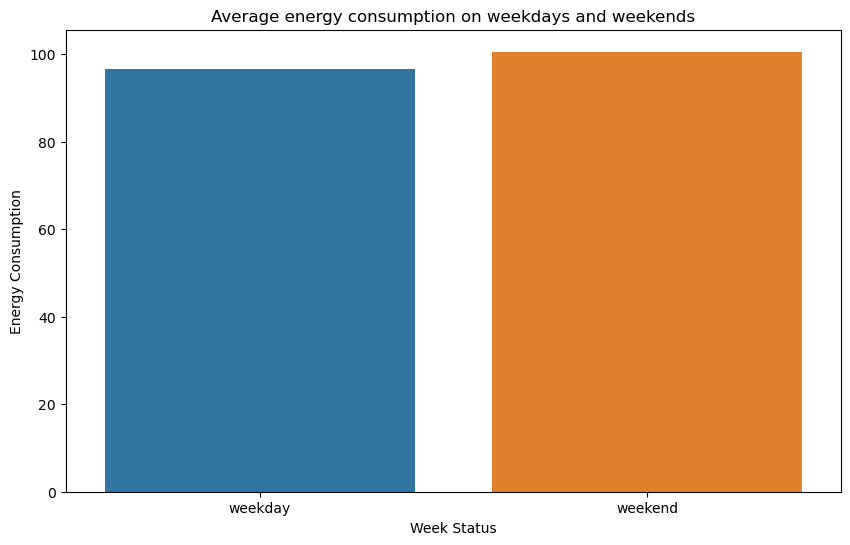

In [632]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Week_Status', y='Appliances', data=df.groupby('Week_Status')['Appliances'].mean().reset_index())
plt.title("Average energy consumption on weekdays and weekends")
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.show()

In [633]:
# Create dummy columns for the day of the week column to remove string values.
df = pd.concat([df, pd.get_dummies(df["Day_of_week"], prefix="Day_of_week").astype(int)], axis=1)

In [634]:
#Create dummy columns for the week status column to remove string values.
df = pd.concat([df, pd.get_dummies(df["Week_Status"], prefix="Week_Status").astype(int)], axis=1)

In [635]:
#Dropping the column that no longer needed
df.drop(columns=["Week_Status", "Day_of_week"], inplace=True)

In [636]:
#Creating a column to store the number of seconds from midnight
df["NSM"] = df["date"].dt.time.apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [637]:
#Checking whether all the new columns are added correctly
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Week_Status_weekday,Week_Status_weekend,NSM
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,0,1,0,0,0,0,0,1,0,61200
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,0,1,0,0,0,0,0,1,0,61800
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,0,1,0,0,0,0,0,1,0,62400
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,0,1,0,0,0,0,0,1,0,63000
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,0,1,0,0,0,0,0,1,0,63600


### 3. Pre-process the data

In [644]:
X = df.drop(["Appliances", "date"], axis=1)
y = df["Appliances"]

In [645]:
# I used the standard scaler because it is less sensitive to outliers and because the features in the data have different units and scales.
scaler = StandardScaler()

In [646]:
#Scaled data is converted again to pandas dataframe
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### 4. Implement, train and test prediction models

In [647]:
# I used train test split instead of cross validation mainly because data is big and computationally expensive
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=101, test_size=0.25)

In [656]:
# The model with low rmse and mae and high r2score will be the better model
def display_result(rmse, r2, mae):
  print(f"Root mean squared error: {rmse}")
  print(f"R2 Score: {r2}")
  print(f"Mean absolute error: {mae}")

#### Linear Regression

In [648]:
# n_jobs is set to -1 to use all the CPU cores during running
model1 = LinearRegression(n_jobs=-1)

In [649]:
model1.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [650]:
pred1 = model1.predict(X_test)

In [651]:
rmse1 = np.sqrt(mean_squared_error(pred1, y_test))
r2_score1 = r2_score(y_test, pred1)
mae1 = mean_absolute_error(pred1, y_test)

In [657]:
display_result(rmse1, r2_score1, mae1)

Root mean squared error: 93.1640167008669
R2 Score: 0.17852012095638647
Mean absolute error: 53.68522654313038


#### Support Vector Machine

In [663]:
model2 = SVR()

In [664]:
model2.fit(X_train, y_train)

SVR()

In [665]:
pred2 = model2.predict(X_test)

In [666]:
rmse2 = np.sqrt(mean_squared_error(pred2, y_test))
r2_score2 = r2_score(y_test, pred2)
mae2 = mean_absolute_error(pred2, y_test)

In [667]:
display_result(rmse2, r2_score2, mae2)

Root mean squared error: 101.67048217431908
R2 Score: 0.021658924309148397
Mean absolute error: 43.82491272636568


#### Random Forest

In [668]:
# Made n_estimator high as possible for better performance
model3 = RandomForestRegressor(n_estimators=10000, max_features="sqrt")

In [669]:
model3.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=10000)

In [670]:
pred3 = model3.predict(X_test)

In [671]:
rmse3 = np.sqrt(mean_squared_error(pred3, y_test))
r2_score3 = r2_score(y_test, pred3)
mae3 = mean_absolute_error(pred3, y_test)

In [672]:
display_result(rmse3, r2_score3, mae3)

Root mean squared error: 67.4483123769707
R2 Score: 0.5694310611630975
Mean absolute error: 31.52214916903121


#### Gradient Boost

In [673]:
# Made n_estimator high as possible for better performance
model4 = GradientBoostingRegressor(n_estimators=1000)

In [674]:
model4.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

In [675]:
pred4 = model4.predict(X_test)

In [676]:
rmse4 = np.sqrt(mean_squared_error(pred4, y_test))
r2_score4 = r2_score(y_test, pred4)
mae4 = mean_absolute_error(pred4, y_test)

In [677]:
display_result(rmse4, r2_score4, mae4)

Root mean squared error: 76.79446511855849
R2 Score: 0.44183787804247443
Mean absolute error: 39.94618453984587


### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

<table>
        <tr>
            <th>Model</th>
            <th>RMSE</th>
            <th>R2 Score</th>
            <th>MAE</th>
        </tr>
        <tr>
            <td>Linear Regression</td>
            <td>93.16</td>
            <td>0.18</td>
            <td>53.68</td>
        </tr>
        <tr>
            <td>Support Vector Machines</td>
            <td>101.67</td>
            <td>0.02</td>
            <td>43.82</td>
        </tr>
        <tr>
            <td>Random Forest</td>
            <td>67.45</td>
            <td>0.57</td>
            <td>31.52</td>
        </tr>
        <tr>
            <td>Gradient Boost</td>
            <td>76.79</td>
            <td>0.44</td>
            <td>39.95</td>
        </tr>
    </table>

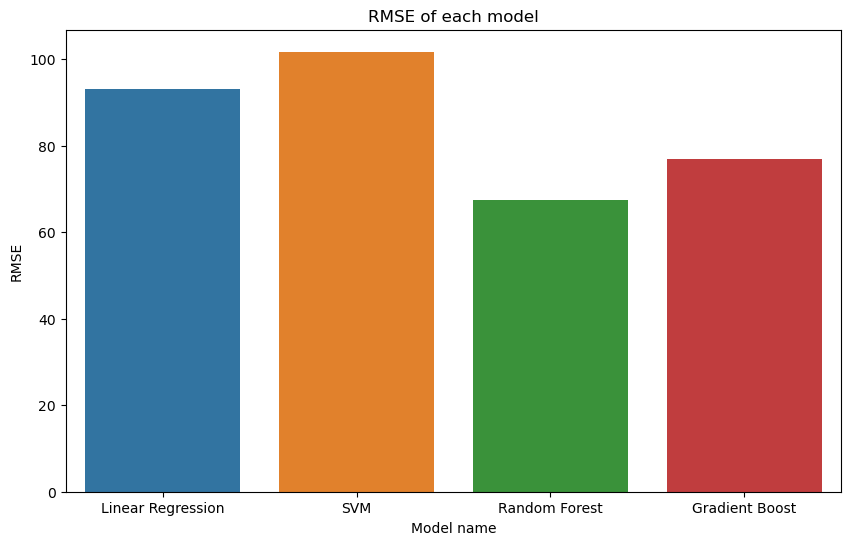

In [685]:
plt.figure(figsize=(10, 6))
sns.barplot(x=["Linear Regression", "SVM", "Random Forest", "Gradient Boost"], y=[rmse1, rmse2, rmse3, rmse4])
plt.title("RMSE of each model")
plt.xlabel("Model name")
plt.ylabel("RMSE")
plt.show()

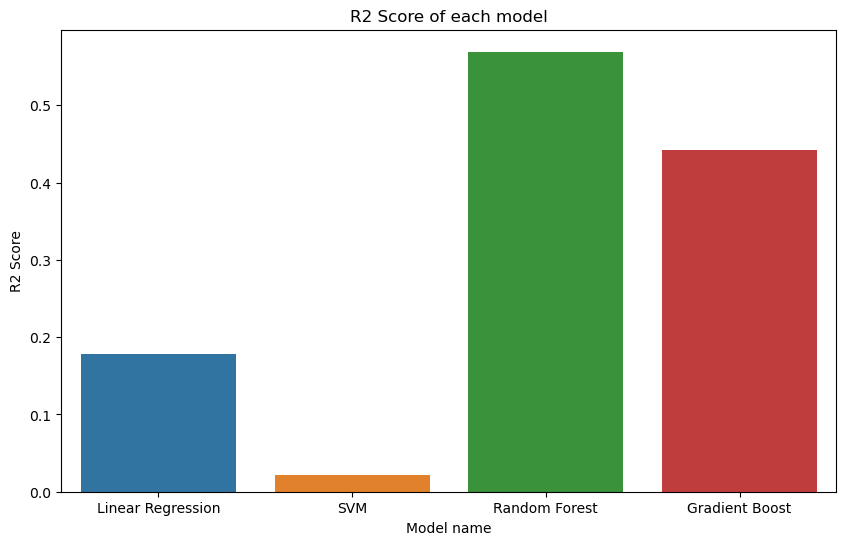

In [684]:
plt.figure(figsize=(10, 6))
sns.barplot(x=["Linear Regression", "SVM", "Random Forest", "Gradient Boost"], y=[r2_score1, r2_score2, r2_score3, r2_score4])
plt.title("R2 Score of each model")
plt.xlabel("Model name")
plt.ylabel("R2 Score")
plt.show()

##### From the above table and plots, we can conclude that random forest regression model perform better with low root mean squared error and mean absolute error, along with a higher R2 score.

In [686]:
# Now, to plot the importance of each feature of random forest regression model, that is model3.
importances = model3.feature_importances_
features = X_train.columns

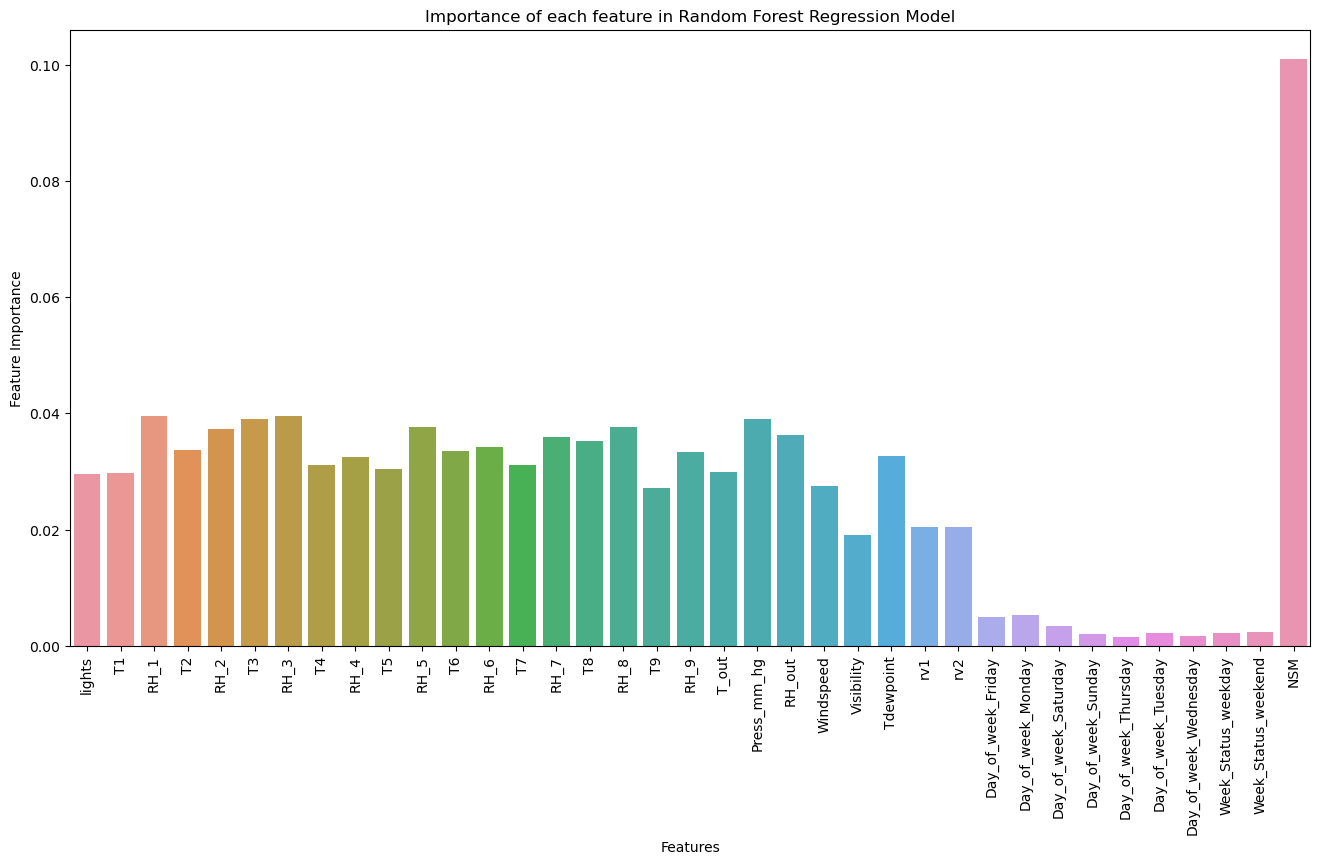

In [691]:
plt.figure(figsize=(16, 8))
sns.barplot(x=features, y=importances)
plt.xticks(rotation=90)
plt.title("Importance of each feature in Random Forest Regression Model")
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.show()

##### From the above plot showing the feature importance of the Random Forest regression model, we can see that NSM, the number of seconds from midnight, is of significant importance. All other features, other than days of the week and week status, have moderate importance. While days of the week and week status are showing the least importance. When considering days of the week alone, we can see that Friday and Monday have slightly more importance.

### 6. Reflect on what you have learned by completing this assignment and how to improve the models

##### Finishing this project has been a rewarding experience that has provided insightful knowledge about the complex process of creating and evaluating regression models designed to predict energy use in low-energy homes. As the project progressed, a more thorough grasp of the dataset emerged, including an appreciation of its properties and how they relate to the objective variable—energy usage—as well as the ability to identify any underlying patterns or trends that may be present in the data. The investigation of various preprocessing methods, including the utilisation of StandardScaler, highlighted the importance of thorough data preparation that includes tasks such as numerical feature scaling, categorical variable encoding, and outlier handling. 
##### I now have a more sophisticated grasp of the advantages, disadvantages, and performance of a variety of regression models, such as Gradient Boosting Regressor, Random Forest Regressor, SVR, and Linear Regression, after investigating them all. I think I've gotten better at analysing model performance with measures like RMSE, R2 score, and MAE, which gives me the ability to evaluate model efficacy thoroughly.
##### I can further improve my models going forward by experimenting with ensemble approaches, cross-validation techniques, hyperparameter adjustment, feature selection, and model interpretability, all of which will promote ongoing expertise in regression modelling. Also, in the paper that I referenced, after finding the better model, it can be seen that, that specific model is trained and tested again with different combination of available features. Doing this will help with the deep dive into the importance of certain crucial features.



### 7. References

##### Candanedo, LM, Feldheim, V & Deramaix, D 2017, 'Data driven prediction models of energy use of appliances in a low-energy house', Energy and buildings, vol. 140, pp. 81-97.